# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [46]:
data = pd.read_csv(r"C:\Users\Tomjl\OneDrive\Desktop\Py_notebooks_scripts\MDST\2023-Tutorials\data\states_edu.csv")
df = pd.DataFrame(data)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [47]:
df.rename(columns = {"GRADES_PK": "Pre_K_Enrollment",
                               "GRADES_4_G":"4th_Enrollment",
                               "GRADES_8_G":"8th_Enrollment",
                               "GRADES_12_G":"12th_Enrollment",
                               "GRADES_1_8":"1_8th_Enrollment",
                               "GRADES 9_12":"9_12th_Enrollment",
                               "GRADES_ALL": "Total_Enrollment"},
                               inplace = True)
#df.isna().sum()
df_simple = df.dropna()
df_fillwzero = df.fillna(0)
column_names = df.columns.tolist()
#print("column names:", column_names)
df_simple.head()
# for the purpose of this tutorial, i will stick with drop na and only examine 2003 and onwards

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4th_Enrollment,8th_Enrollment,12th_Enrollment,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *MATH 8*

How many years of data are logged in our dataset? 

In [48]:
print(f"Range of years is from {df_simple['YEAR'].min()} to {df_simple['YEAR'].max()}")

Range of years is from 2003 to 2015


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [49]:
df_compare = df_simple[df_simple['STATE'].isin(['MICHIGAN', 'OHIO'])]
df_compare['AVG_MATH_8_SCORE'].mean()

281.85714285714283

Find the average for your outcome score across all states in 2019

In [50]:
df_all_state = df_simple.groupby('STATE')['AVG_MATH_8_SCORE'].mean()
print(df_all_state)

STATE
ALABAMA                 266.285714
ALASKA                  281.285714
ARIZONA                 277.142857
ARKANSAS                274.285714
CALIFORNIA              270.833333
COLORADO                286.428571
CONNECTICUT             284.571429
DELAWARE                281.428571
DISTRICT_OF_COLUMBIA    254.000000
FLORIDA                 276.428571
GEORGIA                 275.857143
HAWAII                  273.285714
IDAHO                   284.142857
ILLINOIS                281.000000
INDIANA                 285.000000
IOWA                    284.714286
KANSAS                  287.285714
KENTUCKY                278.142857
LOUISIANA               270.285714
MAINE                   285.428571
MARYLAND                284.000000
MASSACHUSETTS           296.142857
MICHIGAN                278.000000
MINNESOTA               293.000000
MISSISSIPPI             266.285714
MISSOURI                281.142857
MONTANA                 288.571429
NEBRASKA                284.000000
NEVADA        

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [51]:
df_all_state = df_simple.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print(df_all_state)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [52]:
# base case examples: 
df_simple['P_TOTAL_EXP'] = df_simple['TOTAL_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
# INSTRUCTOR EXPENDITURES
df_simple['P_INS_EXP'] = df_simple['INSTRUCTION_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
#SUPPORT SERVICES EXPENDITURES
df_simple['P_SUPP_EXP'] = df_simple['SUPPORT_SERVICES_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
#CAPITAL OUTLAY EXPENDITURES
df_simple['P_CAPOUT_EXP'] = df_simple['CAPITAL_OUTLAY_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
df_simple.head(10)

C:\Users\Tomjl\AppData\Local\Temp\ipykernel_11128\1002906294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['P_TOTAL_EXP'] = df_simple['TOTAL_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
C:\Users\Tomjl\AppData\Local\Temp\ipykernel_11128\1002906294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['P_INS_EXP'] = df_simple['INSTRUCTION_EXPENDITURE'] / df_simple['TOTAL_REVENUE']
C:\Users\Tomjl\AppData\Local\Temp\ipykernel_11128\1002906294.py:6: SettingWithCopyWarning: 
A value is tryin

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,P_TOTAL_EXP,P_INS_EXP,P_SUPP_EXP,P_CAPOUT_EXP
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,205907.0,731220.0,223.0,262.0,207.0,253.0,1.019799,0.542164,0.292811,0.083194
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,40238.0,133933.0,233.0,279.0,212.0,256.0,1.129276,0.535451,0.360498,0.173222
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,307272.0,1012068.0,229.0,271.0,209.0,255.0,0.951055,0.430467,0.300806,0.132413
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,132712.0,454523.0,229.0,266.0,214.0,258.0,1.000470,0.545684,0.300066,0.076280
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,1854518.0,6413867.0,227.0,267.0,206.0,251.0,0.998897,0.494209,0.284713,0.122736
566,2003_COLORADO,COLORADO,2003,751049.0,6297242.0,400219.0,2715219.0,3181804.0,6685029.0,3168745.0,...,221368.0,757693.0,235.0,283.0,224.0,268.0,1.061580,0.503196,0.341381,0.130395
567,2003_CONNECTICUT,CONNECTICUT,2003,548466.0,6959891.0,351001.0,2481901.0,4126989.0,6751815.0,3721466.0,...,169409.0,577203.0,241.0,284.0,228.0,267.0,0.970104,0.534702,0.280408,0.077569
568,2003_DELAWARE,DELAWARE,2003,111282.0,1242436.0,91986.0,794472.0,355978.0,1317447.0,673997.0,...,34770.0,117668.0,236.0,277.0,224.0,265.0,1.060374,0.542480,0.295919,0.137832
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,16828.0,78057.0,205.0,243.0,188.0,239.0,0.992731,0.424944,0.364502,0.174387
570,2003_FLORIDA,FLORIDA,2003,2536699.0,19549835.0,1956803.0,8689141.0,8903891.0,20180142.0,9622598.0,...,755252.0,2587628.0,234.0,271.0,218.0,257.0,1.032241,0.492209,0.303748,0.149573


Wanted to get ride of the nominal values for something that is a bit more meaningful
converting nominal expenditure values to percentage of total state revenue tells more information then nominal revnue.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

C:\Users\Tomjl\AppData\Local\Temp\ipykernel_11128\2143651508.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='P_INS_EXP', y='AVG_MATH_8_SCORE',


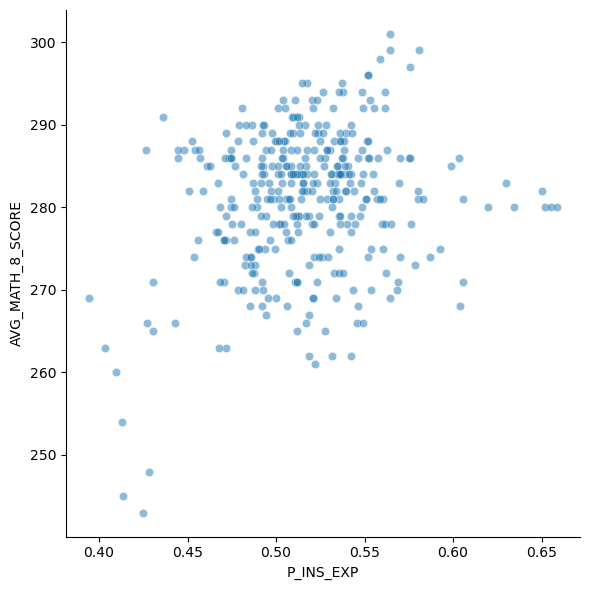

In [53]:
import seaborn as sns
sns.relplot(x='P_INS_EXP', y='AVG_MATH_8_SCORE',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_simple)


**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot: ylabel='Frequency'>

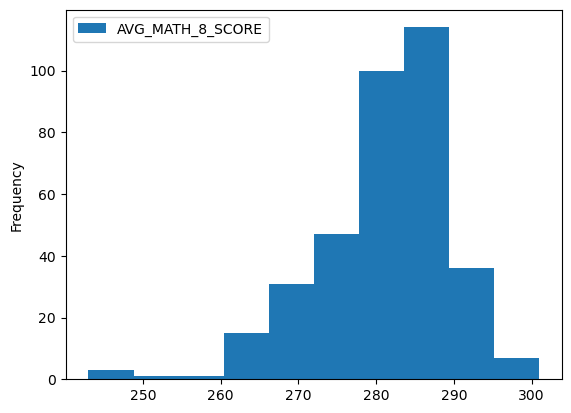

In [54]:
df_plot = df_simple.groupby('YEAR')
x_s = ['P_INS_EXP', 'SUPPORT_SERVICES_EXPENDITURE']
df_simple.plot.hist(x='P_INS_EXP', y = 'AVG_MATH_8_SCORE')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [55]:
from sklearn.model_selection import train_test_split

In [65]:
X = df_simple[['P_TOTAL_EXP','P_INS_EXP','SUPPORT_SERVICES_EXPENDITURE']].dropna()
y = df_simple.loc[X.index]['AVG_MATH_8_SCORE']
y.isna().sum()

0

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [74]:
# import your sklearn class here
from sklearn.linear_model import Lasso


In [81]:
# create your model here
model = Lasso(alpha=0.6)

In [82]:
#linear_reg.fit(X_train,y_train)
model.fit(X_train,y_train)

Lasso(alpha=0.6)

In [83]:
#y_pred_lin = linear_reg.predict(X_test)
y_pred_lasso = model.predict(X_test)
y_pred_lasso

array([280.84401562, 281.37538188, 281.13255008, 280.80245863,
       280.71220448, 280.94508003, 280.70960274, 281.33025154,
       280.80398519, 280.91019462, 280.68932673, 281.15243868,
       281.5038667 , 280.75959138, 280.67935587, 281.44883482,
       281.00507843, 280.70517311, 280.97005697, 281.01484007,
       281.12659083, 280.76290585, 280.68541336, 280.76234418,
       280.73579426, 280.91913158, 280.89348494, 280.72552228,
       280.77063859, 280.94199856, 280.70727834, 280.77935489,
       280.70653144, 282.43305497, 280.76720693, 281.09667224,
       281.10574495, 280.68261979, 280.8780084 , 280.72365638,
       280.9110753 , 280.81309729, 280.72741869, 280.94111848,
       280.70466505, 280.9258474 , 282.69062302, 280.81530835,
       280.86435057, 280.91874702, 280.82398071, 280.74103594,
       280.7016754 , 280.68979096, 280.68763213, 281.33264664,
       281.14548728, 280.9282881 , 280.68420984, 281.2461234 ,
       280.69576749, 280.68339581, 281.8991001 , 280.88

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [84]:
print("Regression Intercept", model.intercept_)
print("Regression Coefficients", model.coef_, sep="\n")

print("R^2", model.score(X_test, y_test))
print("Mean error", np.mean(model.predict(X_test)-y_test))
print("Mean absolute error", np.mean(np.abs(model.predict(X_test)-y_test)))
print("Root mean squared error", np.mean(
    (model.predict(X_test)-y_test)**2)**0.5)

Regression Intercept 280.65133300548666
Regression Coefficients
[-0.00000000e+00  0.00000000e+00  9.87301313e-08]
R^2 0.0012240736722363144
Mean error -0.03333206497135317
Mean absolute error 6.539104089046265
Root mean squared error 8.300178818653613


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

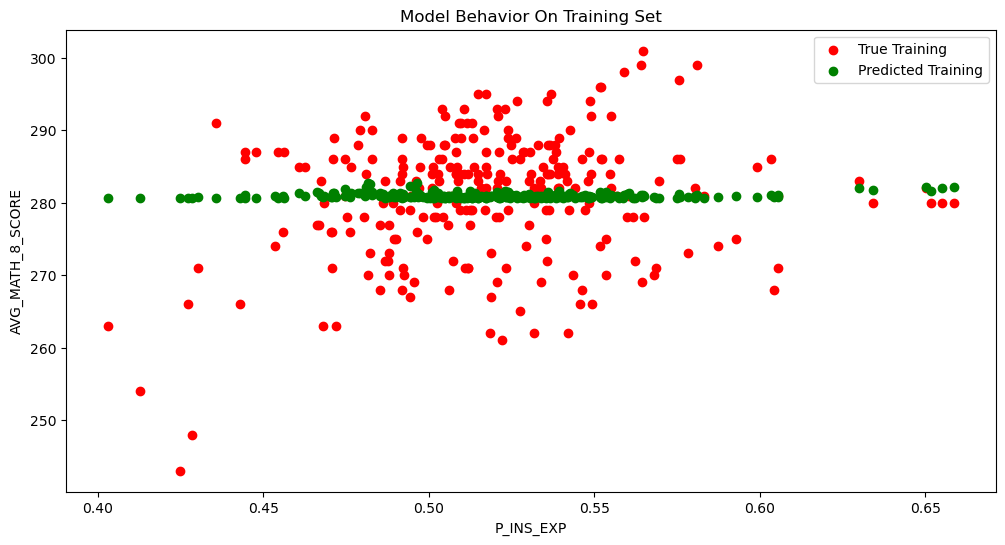

In [85]:
col_name = 'P_INS_EXP'
f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

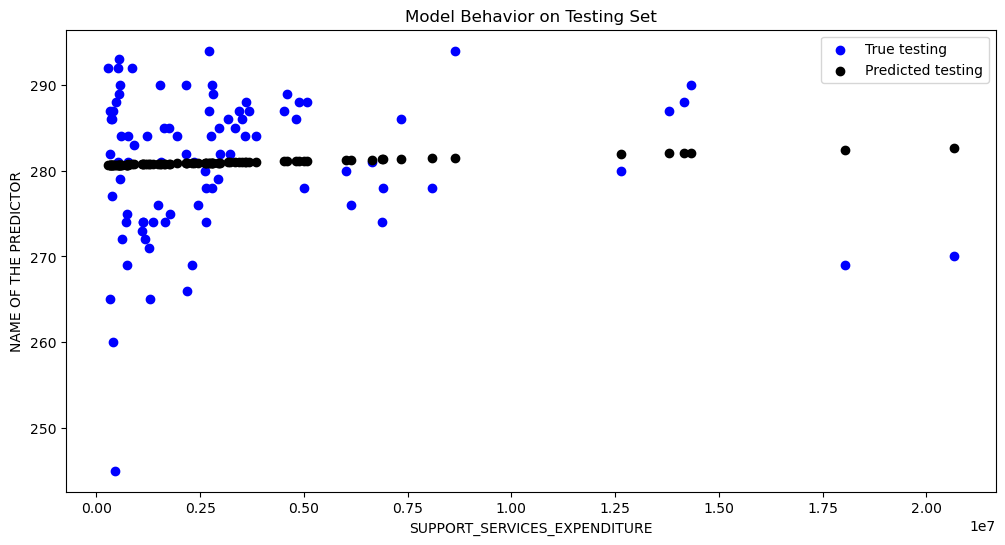

In [86]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(['True testing', 'Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In this analysis, our response variable was Grade 8 math score. We chose to predict it by the spending of various states. Data was cleaned, with missing data addressed (out right removed for simplicity). The expenditures were transformed as well. Using nominal values is a bad idea, given the workings of currency. we took the spending as a percentage of the revenue by state. 
Our split was 30 , 70 for the testing with a lasso regression applied which is simply just a quadratic progam: 
Given the model outputs ($\vec{\beta}$ and $R^2$) the model performed very poorly. A better analysis would include prior scores, such as grade 4 math, and a more compelx time series study might be appropriate as well